In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Class for a single slot machine. Rewards are Gaussian.
class GaussianBandit(object):
    def __init__(self, mean=0, stdev=1):
        self.mean = mean
        self.stdev = stdev
    
    def pull_lever(self):
        reward = np.random.normal(self.mean, self.stdev)
        return np.round(reward, 1)
    
# Class to initialize all Gaussian bandits and play the game.
class GaussianBanditGame(object):
    def __init__(self, bandits):
        self.bandits = bandits
#         np.random.shuffle(self.bandits)
        self.reset_game()
    
    def play(self, choice):
        reward = self.bandits[choice - 1].pull_lever()
        self.rewards.append(reward)
        self.total_reward += reward
        self.n_played += 1
        return reward
    
    def user_play(self):
        self.reset_game()
        print("Game started. " + 
              "Enter 0 as input to end the game.")
        while True:
            print(f"\n -- Round {self.n_played}")
            choice = int(input(f"Choose a machine " + 
                     f"from 1 to {len(self.bandits)}: "))
            if choice in range(1, len(self.bandits) + 1):
                reward = self.play(choice)
                print(f"Machine {choice} gave " + 
                      f"a reward of {reward}.")
                avg_rew = self.total_reward/self.n_played
                print(f"Your average reward " +
                      f"so far is {avg_rew}.")
            else:
                break
        print("Game has ended.")
        if self.n_played > 0:
            print(f"Total reward is {self.total_reward}" + 
                  f" after {self.n_played} round(s).")
            avg_rew = self.total_reward/self.n_played
            print(f"Average reward is {avg_rew}.")
            
    def user_play_random_pick(self):
        avg_reward = []
        self.reset_game()
        print("Game started.")
        
        for i in range(10000):
            choice = np.random.choice(3)+1
            reward = self.play(choice)
            avg_rew = self.total_reward/self.n_played
            avg_reward.append(avg_rew)

        print("Game has ended.")
        if self.n_played > 0:
            print(f"Total reward is {self.total_reward}" + 
                  f" after {self.n_played} round(s).")
            avg_rew = self.total_reward/self.n_played
            print(f"Average reward is {avg_rew}.")
            
        plt.plot(avg_reward)
        plt.title("Average Rewards")
        plt.show()
    
    def user_play_exploit_pick(self):
        avg_reward = []
        self.reset_game()
        print("Game started.")
        
        for i in range(10000):
            choice = 2
            reward = self.play(choice)
            avg_rew = self.total_reward/self.n_played
            avg_reward.append(avg_rew)

        print("Game has ended.")
        if self.n_played > 0:
            print(f"Total reward is {self.total_reward}" + 
                  f" after {self.n_played} round(s).")
            avg_rew = self.total_reward/self.n_played
            print(f"Average reward is {avg_rew}.")
            
        plt.plot(avg_reward)
        plt.title("Average Rewards")
        plt.show()
            
    def reset_game(self):
        self.rewards = []
        self.total_reward = 0
        self.n_played = 0
        
slotA = GaussianBandit(5, 3)
slotB = GaussianBandit(6, 2) # Best slot machine with highest reward
slotC = GaussianBandit(1, 5)
game = GaussianBanditGame([slotA, slotB, slotC])

#game.user_play()

Game started.
Game has ended.
Total reward is 40144.90000000019 after 10000 round(s).
Average reward is 4.014490000000019.


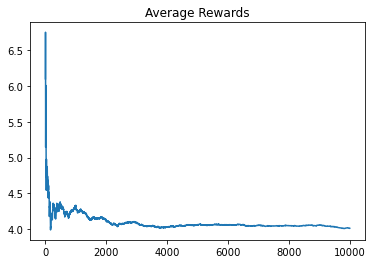

In [2]:
# Automating the slot picking using random decision and visualizing the reward
game.user_play_random_pick()

Game started.
Game has ended.
Total reward is 60008.699999999895 after 10000 round(s).
Average reward is 6.000869999999989.


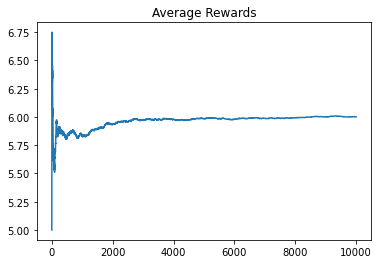

In [3]:
# Reward if the agent always picks the best slot machine
game.user_play_exploit_pick()

Estimated probabilities 0.9026654687032037
Estimated probabilities 0.7975609756097547
Estimated probabilities 0.5025140490978998
Total reward earned =  7329.0
Overall win rate =  0.7329
Number of optimal pulls =  3339


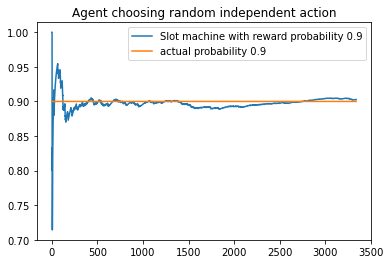

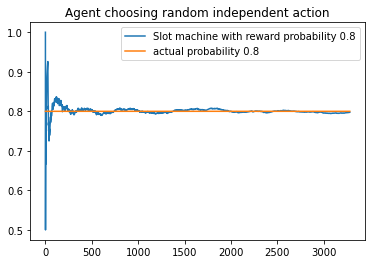

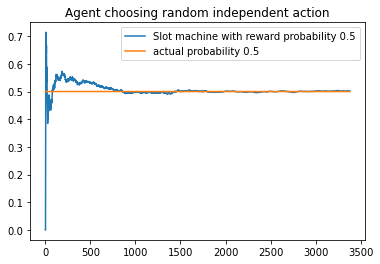

In [4]:
## Multi-Arm Bandit code
import numpy as np
import matplotlib.pyplot as plt
Bandit_probs= [0.9,0.8,0.5]
num_trails = 10000

class Bandit:
    def __init__(self, prob):
        self.actual_prob = prob
        self.prob_estimate = 0
        self.N = 0
    def pull(self):
        return np.random.random()<self.actual_prob
    def update(self,x):
        self.N+=1
        self.prob_estimate+=(1/self.N)*(x-self.prob_estimate)
        return self.prob_estimate
    
def experiment():
    bandits = [Bandit(p) for p in Bandit_probs]
    rewards = np.zeros(num_trails)
    slot_rew = [[], [], []]
    num_steps = 0
    num_optimal = 0
    optimal_j = np.argmax([b.actual_prob for b in bandits])
    
    for i in range(num_trails):
        j = np.random.choice(len(bandits))
        num_steps +=1
        
        if j == optimal_j:
            num_optimal+=1
            
        rewards[i] = bandits[j].pull()
        curr_estimate = bandits[j].update(rewards[i])
        slot_rew[j].append(curr_estimate)
        
        
    for b in bandits:
        print("Estimated probabilities", b.prob_estimate)
        
    print("Total reward earned = ", rewards.sum())
    print("Overall win rate = ", rewards.sum()/num_trails)
    print("Number of optimal pulls = ", num_optimal)

    for i in range(len(slot_rew)):
        plt.plot(slot_rew[i], label = "Slot machine with reward probability {}".format(Bandit_probs[i]))
        plt.plot(np.ones(len(slot_rew[i]))*(Bandit_probs[i]), label = 'actual probability {}'.format(Bandit_probs[i]))
        plt.legend()
        plt.title("Agent choosing random independent action")
        plt.show()
    
if __name__ == "__main__":
    experiment()